### LLM의 한계점

LLM의 주요 한계점 시각화

1. 지식 단절 문제


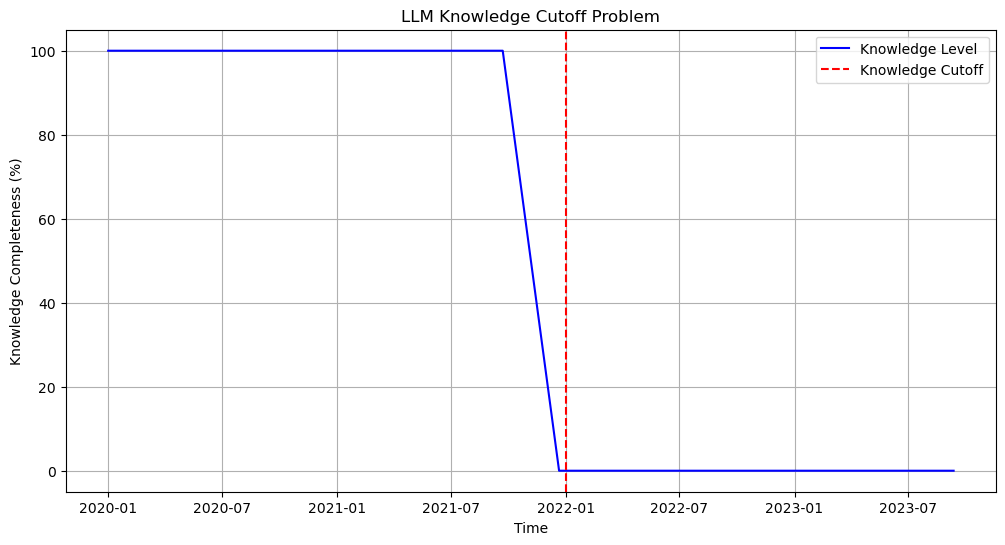


2. 환각 현상


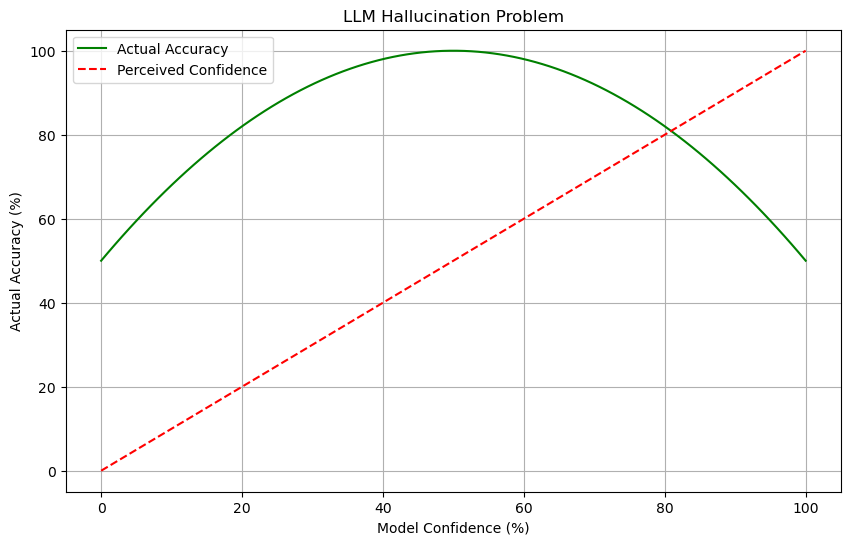


3. 컨텍스트 윈도우 제한


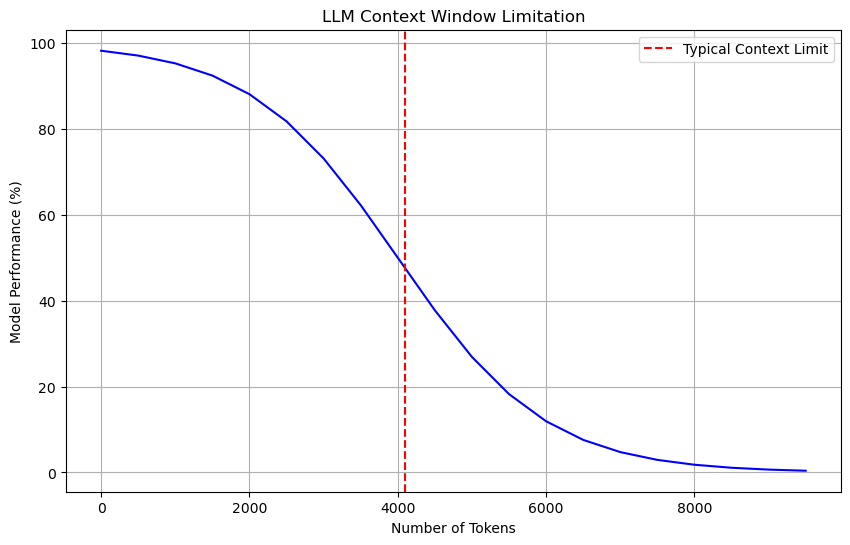

토큰 수 증가에 따른 성능 저하를 설명하는데, 여기서 토큰이란 텍스트를 처리하기 위해 작은 단위로 나눈 피스를 말함. 대화와 문서 처리 제한이 발생하고 이를 보완하기 위해 RAG를 활용함.

4. 편향성 문제


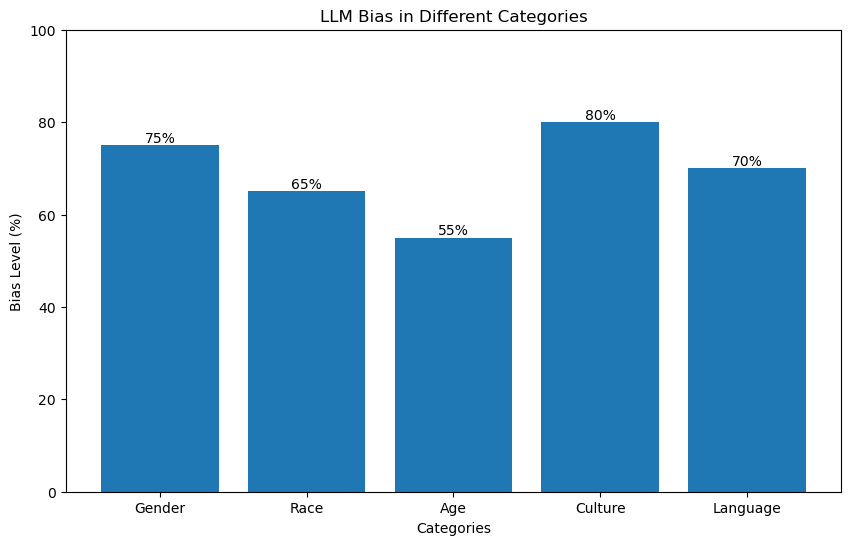

편향성 문제란, 특정 패턴에의 과대/과소 학습을 의미하며 표현 방식과 결정 규칙에서의 편향을 의미함.(=차별의 데이터화)


In [15]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

def plot_knowledge_cutoff():
    """LLM의 지식 단절 문제 시각화"""
    # 데이터 준비
    dates = [datetime(2020, 1, 1) + timedelta(days=x*90) for x in range(16)]
    knowledge = [100] * 8 + [0] * 8  # 2022년 기준 지식 단절
    
    plt.figure(figsize=(12, 6))
    plt.plot(dates, knowledge, 'b-', label='Knowledge Level')
    plt.axvline(x=datetime(2022, 1, 1), color='r', linestyle='--', label='Knowledge Cutoff')
    
    plt.title('LLM Knowledge Cutoff Problem')
    plt.xlabel('Time')
    plt.ylabel('Knowledge Completeness (%)')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_hallucination():
    """환각 현상 시각화"""
    # 데이터 준비
    confidence = np.linspace(0, 100, 100)
    accuracy = 100 - (confidence - 50)**2 / 50  # 자신감과 정확도의 관계
    
    plt.figure(figsize=(10, 6))
    plt.plot(confidence, accuracy, 'g-', label='Actual Accuracy')
    plt.plot(confidence, confidence, 'r--', label='Perceived Confidence')
    
    plt.title('LLM Hallucination Problem')
    plt.xlabel('Model Confidence (%)')
    plt.ylabel('Actual Accuracy (%)')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_context_window():
    """컨텍스트 윈도우 제한 시각화"""
    # 데이터 준비
    tokens = np.arange(0, 10000, 500)
    performance = 100 * (1 - 1/(1 + np.exp(-0.001*(tokens-4000))))
    
    plt.figure(figsize=(10, 6))
    plt.plot(tokens, performance, 'b-')
    plt.axvline(x=4096, color='r', linestyle='--', label='Typical Context Limit')
    
    plt.title('LLM Context Window Limitation')
    plt.xlabel('Number of Tokens')
    plt.ylabel('Model Performance (%)')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_bias():
    """편향성 문제 시각화"""
    # 데이터 준비
    categories = ['Gender', 'Race', 'Age', 'Culture', 'Language']
    bias_levels = [75, 65, 55, 80, 70]
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(categories, bias_levels)
    
    plt.title('LLM Bias in Different Categories')
    plt.xlabel('Categories')
    plt.ylabel('Bias Level (%)')
    
    # 바 위에 값 표시
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}%', ha='center', va='bottom')
    
    plt.ylim(0, 100)
    plt.show()

def main():
    """모든 시각화 실행"""
    print("LLM의 주요 한계점 시각화")
    print("\n1. 지식 단절 문제")
    plot_knowledge_cutoff()
    
    print("\n2. 환각 현상")
    plot_hallucination()
    
    print("\n3. 컨텍스트 윈도우 제한")
    plot_context_window()
    print("토큰 수 증가에 따른 성능 저하를 설명하는데, 여기서 토큰이란 텍스트를 처리하기 위해 작은 단위로 나눈 피스를 말함. 대화와 문서 처리 제한이 발생하고 이를 보완하기 위해 RAG를 활용함.")

    print("\n4. 편향성 문제")
    plot_bias()
    print("편향성 문제란, 특정 패턴에의 과대/과소 학습을 의미하며 표현 방식과 결정 규칙에서의 편향을 의미함.(=차별의 데이터화)")

if __name__ == "__main__":
    main()

### 이를 보완하는 RAG의 기본 구조

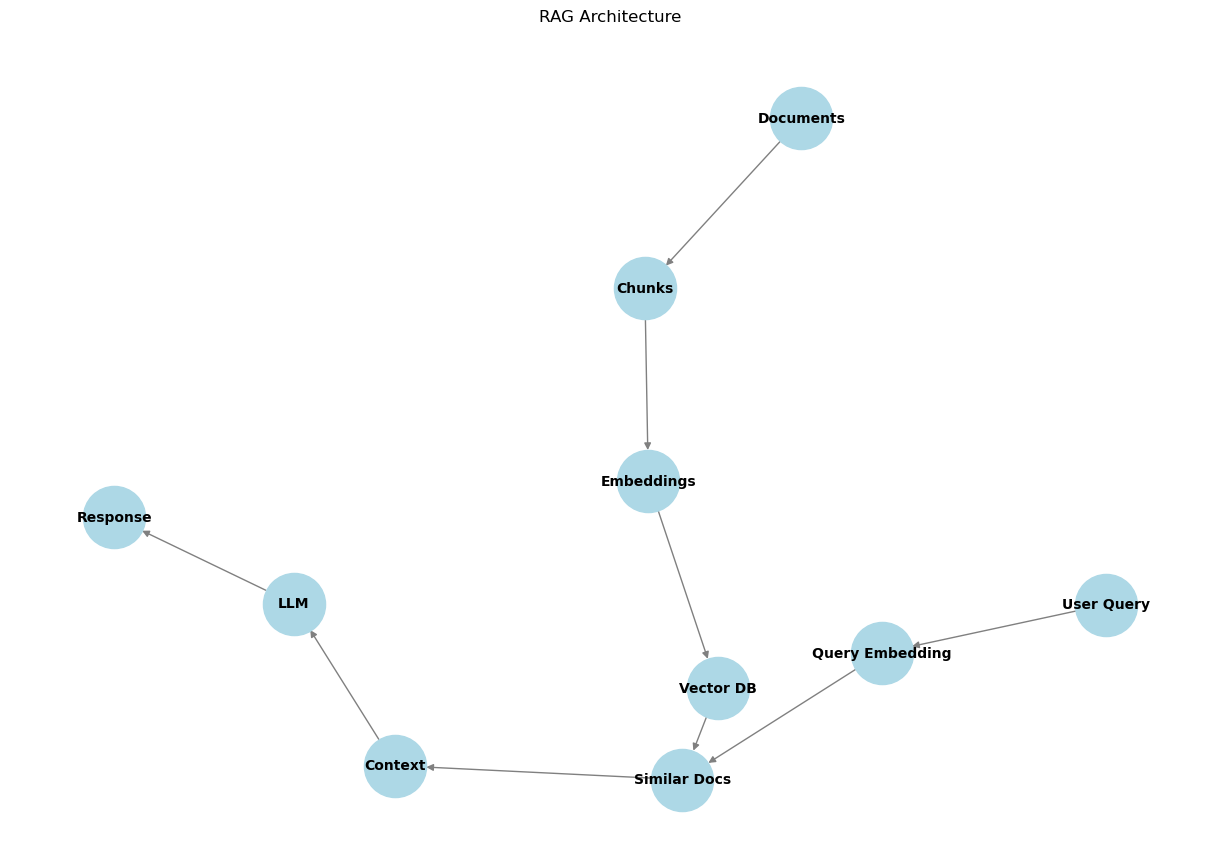

In [9]:
import matplotlib.pyplot as plt
import networkx as nx

# 그래프 생성
G = nx.DiGraph()

# 노드 추가
nodes = ['Documents', 'Chunks', 'Embeddings', 'Vector DB', 
         'User Query', 'Query Embedding', 'Similar Docs',
         'Context', 'LLM', 'Response']

G.add_nodes_from(nodes)

# 엣지 추가
edges = [('Documents', 'Chunks'), ('Chunks', 'Embeddings'),
         ('Embeddings', 'Vector DB'), ('User Query', 'Query Embedding'),
         ('Query Embedding', 'Similar Docs'), ('Vector DB', 'Similar Docs'),
         ('Similar Docs', 'Context'), ('Context', 'LLM'),
         ('LLM', 'Response')]

G.add_edges_from(edges)

# 그래프 레이아웃 설정
pos = nx.spring_layout(G)

# 그래프 그리기
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color='lightblue', 
        node_size=2000, font_size=10, font_weight='bold',
        arrows=True, edge_color='gray')

plt.title('RAG Architecture', pad=20)
plt.axis('off')
plt.show()

### 텍스트의 벡터 변환 , 그리고 Embedding이란?

In [10]:
import numpy as np

# 간단한 텍스트-벡터 변환 함수
def simple_embedding(text):
    """
    텍스트를 고정된 크기의 벡터로 변환
    """
    # 텍스트를 단어로 분리하고 각 단어를 해시값으로 변환
    vector = np.array([hash(word) % 100 for word in text.split()])
    # 벡터 크기를 5로 맞추기
    if len(vector) < 5:
        vector = np.pad(vector, (0, 5 - len(vector)), 'constant')
    elif len(vector) > 5:
        vector = vector[:5]
    return vector

class SimpleVectorDB:
    """
    간단한 벡터 데이터베이스 구현
    """
    def __init__(self):
        self.vectors = []
        self.documents = []
    
    def add_document(self, text):
        """문서를 벡터로 변환하여 저장"""
        vector = simple_embedding(text)
        self.vectors.append(vector)
        self.documents.append(text)
    
    def similarity(self, v1, v2):
        """코사인 유사도 계산"""
        return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    
    def search(self, query, top_k=1):
        """쿼리와 가장 유사한 문서 검색"""
        query_vector = simple_embedding(query)
        similarities = [self.similarity(query_vector, doc_vector) 
                      for doc_vector in self.vectors]
        
        top_indices = np.argsort(similarities)[-top_k:][::-1]
        return [(self.documents[i], similarities[i]) for i in top_indices]

def main():
    # 예시 문서들
    documents = [
        "인공지능은 컴퓨터 과학의 중요한 분야입니다",
        "머신러닝은 데이터로부터 학습하는 방법입니다",
        "딥러닝은 신경망을 사용하는 머신러닝 방법입니다",
        "자연어 처리는 컴퓨터가 인간의 언어를 이해하는 기술입니다"
    ]
    
    # Vector DB 초기화
    db = SimpleVectorDB()
    
    # 1. Document Embedding 예시
    print("1. Document Embedding 예시")
    print("-" * 50)
    for doc in documents:
        db.add_document(doc)
        doc_vector = simple_embedding(doc)
        print(f"문서: {doc}")
        print(f"임베딩 벡터: {doc_vector}\n")
    
    # 2. Query Embedding 예시
    print("\n2. Query Embedding 및 검색 예시")
    print("-" * 50)
    query = "인공지능이 무엇인가요?"
    query_vector = simple_embedding(query)
    print(f"쿼리: {query}")
    print(f"쿼리 임베딩 벡터: {query_vector}\n")
    
    # 3. 검색 결과
    print("\n3. 검색 결과")
    print("-" * 50)
    results = db.search(query, top_k=2)
    for doc, similarity in results:
        print(f"유사도: {similarity:.4f}")
        print(f"문서: {doc}\n")

if __name__ == "__main__":
    main()

1. Document Embedding 예시
--------------------------------------------------
문서: 인공지능은 컴퓨터 과학의 중요한 분야입니다
임베딩 벡터: [ 7 40 10 39 39]

문서: 머신러닝은 데이터로부터 학습하는 방법입니다
임베딩 벡터: [65 55 61 99  0]

문서: 딥러닝은 신경망을 사용하는 머신러닝 방법입니다
임베딩 벡터: [81  8  5 37 99]

문서: 자연어 처리는 컴퓨터가 인간의 언어를 이해하는 기술입니다
임베딩 벡터: [ 8 32 26 48  3]


2. Query Embedding 및 검색 예시
--------------------------------------------------
쿼리: 인공지능이 무엇인가요?
쿼리 임베딩 벡터: [65 58  0  0  0]


3. 검색 결과
--------------------------------------------------
유사도: 0.5906
문서: 머신러닝은 데이터로부터 학습하는 방법입니다

유사도: 0.4926
문서: 딥러닝은 신경망을 사용하는 머신러닝 방법입니다



##### Q. RAG는 처리 가능한 데이터의 양을 통해+ 임베딩을 통한 더 스마트한 맥락 파악을 통해 편향성 문제를 보완하는것인지? 아니면 다른 방식으로 보완 역할을 수행하는지?

### RAG, Agent의 성능을 높여주는 Transformer

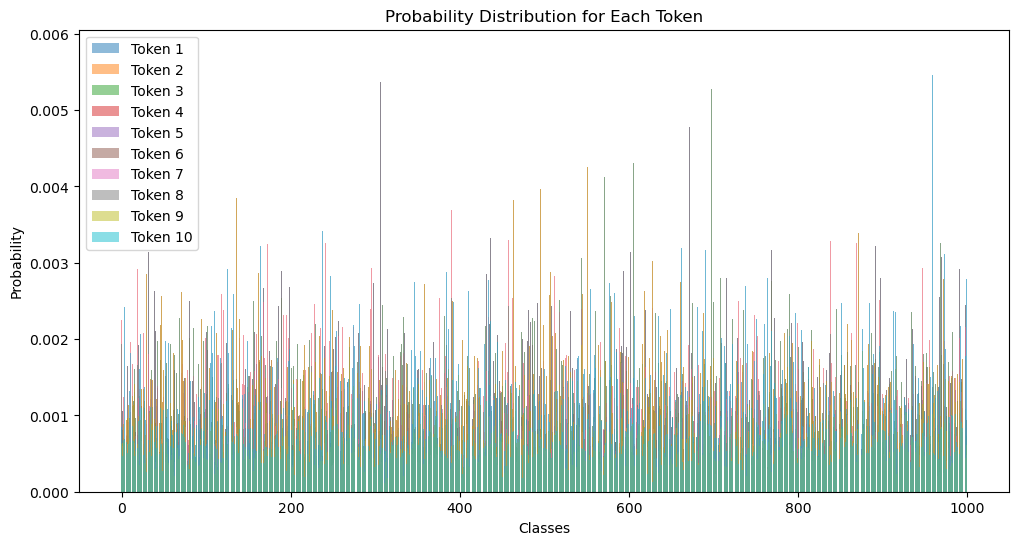

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

# MultiHeadAttention 및 Transformer 클래스 정의

class MultiHeadAttention(nn.Module):
    def __init__(self, embed_size, heads):
        super(MultiHeadAttention, self).__init__()
        self.embed_size = embed_size
        self.heads = heads
        self.head_dim = embed_size // heads

        assert (
            self.head_dim * heads == embed_size
        ), "Embedding size must be divisible by heads"

        self.values = nn.Linear(embed_size, embed_size, bias=False)
        self.keys = nn.Linear(embed_size, embed_size, bias=False)
        self.queries = nn.Linear(embed_size, embed_size, bias=False)
        self.fc_out = nn.Linear(embed_size, embed_size)

    def forward(self, x):
        N = x.shape[0]  # Batch size
        length = x.shape[1]  # Sequence length

        values = self.values(x).view(N, length, self.heads, self.head_dim)
        keys = self.keys(x).view(N, length, self.heads, self.head_dim)
        queries = self.queries(x).view(N, length, self.heads, self.head_dim)

        values = values.permute(0, 2, 1, 3)
        keys = keys.permute(0, 2, 1, 3)
        queries = queries.permute(0, 2, 1, 3)

        energy = torch.einsum("nqhd,nkhd->nqk", [queries, keys])
        attention = F.softmax(energy / (self.embed_size ** (1 / 2)), dim=2)

        out = torch.einsum("nqk,nvhd->nqhd", [attention, values]).reshape(
            N, length, self.heads * self.head_dim
        )

        return self.fc_out(out)

class Transformer(nn.Module):
    def __init__(self, embed_size, heads, input_dim, output_dim):
        super(Transformer, self).__init__()
        self.encoder = nn.Embedding(input_dim, embed_size)
        self.attention = MultiHeadAttention(embed_size, heads)
        self.fc_out = nn.Linear(embed_size, output_dim)

    def forward(self, x):
        x = self.encoder(x)
        x = self.attention(x)
        x = self.fc_out(x)
        return x

# 모델 초기화 및 샘플 입력 생성
embed_size = 256
heads = 8
input_dim = 1000
output_dim = 1000

model = Transformer(embed_size, heads, input_dim, output_dim)
sample_input = torch.randint(0, input_dim, (1, 10))  # Batch size 1, sequence length 10
output = model(sample_input)

# 확률 분포 시각화
def visualize_output(output):
    # Softmax를 통해 확률로 변환
    probabilities = F.softmax(output, dim=2).detach().numpy()
    
    # 첫 번째 시퀀스의 확률 분포 시각화
    plt.figure(figsize=(12, 6))
    for i in range(probabilities.shape[1]):  # 시퀀스 길이
        plt.bar(range(output_dim), probabilities[0, i], alpha=0.5, label=f'Token {i+1}')
    
    plt.title('Probability Distribution for Each Token')
    plt.xlabel('Classes')
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

# 시각화 함수 호출
visualize_output(output)